In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("melb_data.csv")
d = pd.read_csv("melb_data.csv")

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
# Data Provided:-
    
#Rooms: Number of rooms

#Price: Price in dollars

#Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

#Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

#SellerG: Real Estate Agent

#Date: Date sold

#Distance: Distance from CBD

#Regionname: General Region (West, North West, North, North east …etc)

#Propertycount: Number of properties that exist in the suburb.

#Bedroom2 : Scraped # of Bedrooms (from different source)

#Bathroom: Number of Bathrooms

#Car: Number of carspots

#Landsize: Land Size

#BuildingArea: Building Size

#CouncilArea: Governing council for the area

## Missing Value:-

In [5]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
# dropping column with building area as almost half of the data is missing.
df.dropna(inplace=True)

In [7]:
#Replaced the nan value in the BuildingArea with mean
#df['BuildingArea'].replace({np.nan:df['BuildingArea'].mean()},inplace=True)
#df['CouncilArea']=df['CouncilArea'].replace(np.NaN,0)
#Replaced the nan value in the car with YearBuilt
#df['YearBuilt'].replace({np.NaN:df['YearBuilt'].mean()},inplace=True)
#Replaced the nan value in the car with mode value ie,2
df.Car.replace({np.nan:2},inplace=True)

In [8]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

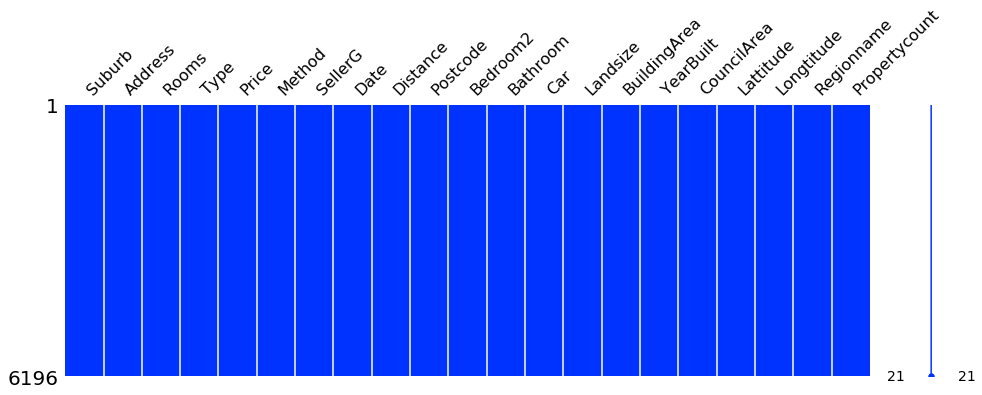

In [9]:
import missingno as msno
msno.matrix(df=df, figsize=(16,5), color=(0,0.2,1));

In [10]:
#Description of our dataset
df.describe().T

#T refers to transpose that displays the description of our dataset in long format.

,count,mean,std,min,25%,50%,75%,max
Rooms,6196.0,2.931407e+00,0.971079,1.00000,2.000000,3.00000,4.000000e+00,8.000000e+00
Price,6196.0,1.068828e+06,675156.427502,131000.00000,620000.000000,880000.00000,1.325000e+06,9.000000e+06
Distance,6196.0,9.751097e+00,5.612065,0.00000,5.900000,9.00000,1.240000e+01,4.740000e+01
Postcode,6196.0,3.101948e+03,86.421604,3000.00000,3044.000000,3081.00000,3.147000e+03,3.977000e+03
Bedroom2,6196.0,2.902034e+00,0.970055,0.00000,2.000000,3.00000,3.000000e+00,9.000000e+00
Bathroom,6196.0,1.576340e+00,0.711362,1.00000,1.000000,1.00000,2.000000e+00,8.000000e+00
Car,6196.0,1.573596e+00,0.929947,0.00000,1.000000,1.00000,2.000000e+00,1.000000e+01
Landsize,6196.0,4.710069e+02,897.449881,0.00000,152.000000,373.00000,6.280000e+02,3.700000e+04
BuildingArea,6196.0,1.415686e+02,90.834824,0.00000,91.000000,124.00000,1.700000e+02,3.112000e+03
YearBuilt,6196.0,1.964082e+03,38.105673,1196.00000,1940.000000,1970.00000,2.000000e+03,2.018000e+03


## Identification of variables and data types:-

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

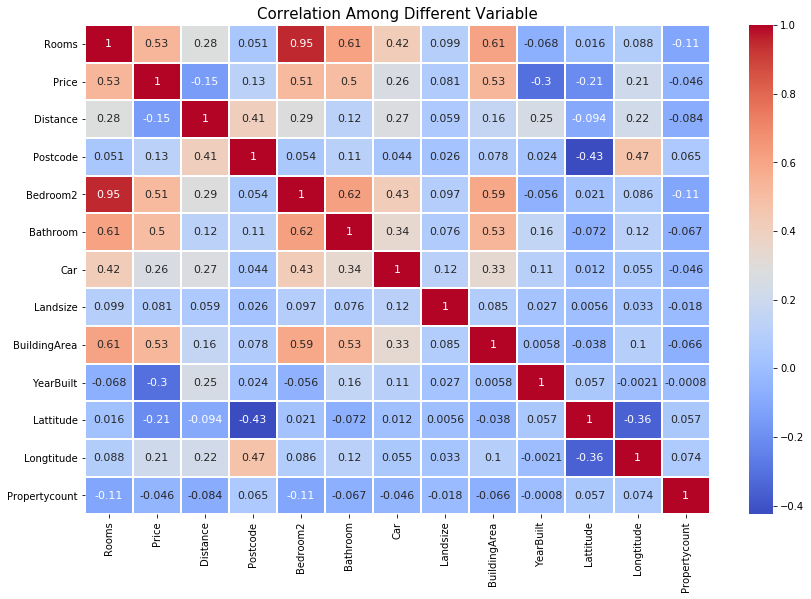

In [12]:
# Prepare the data for correlation

corr=df.corr()

# Relation between different variable
fig,ax=plt.subplots(figsize=(14,9))
sns.heatmap(corr,annot=True,cmap = 'coolwarm',linewidth = 1,annot_kws={"size": 11})
plt.title("Correlation Among Different Variable",size=15);

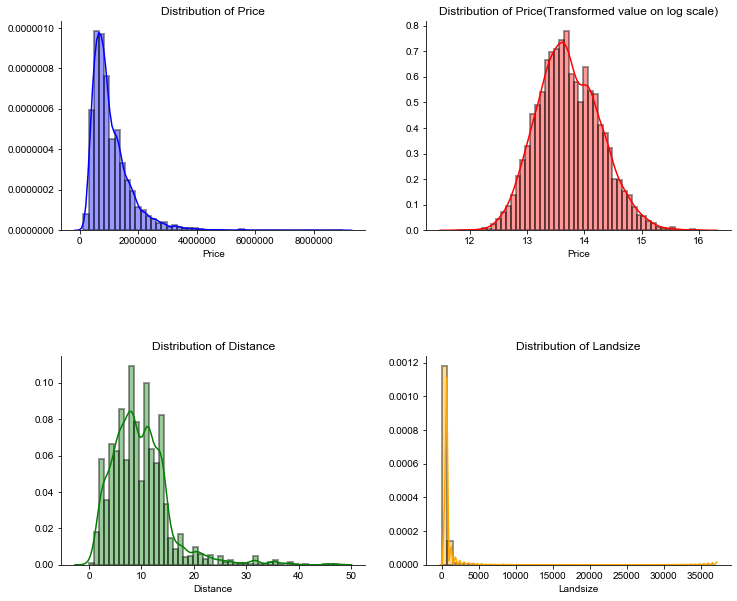

In [13]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 10))

sns.distplot(df['Price'],ax=axarr[0][0],color='blue',hist_kws=dict(edgecolor="k", linewidth=2)).set_title('Distribution of Price')
sns.distplot(df['Distance'],ax=axarr[1][0],color='green',hist_kws=dict(edgecolor="k", linewidth=2)).set_title('Distribution of Distance')
sns.distplot(np.log(df['Price']),ax=axarr[0][1],color='red',hist_kws=dict(edgecolor="k", linewidth=2)).set_title('Distribution of Price(Transformed value on log scale)')
sns.distplot(df['Landsize'],ax=axarr[1][1],color='orange',hist_kws=dict(edgecolor="k", linewidth=2)).set_title('Distribution of Landsize')
plt.subplots_adjust(hspace=.6)
sns.set_style('darkgrid')
sns.despine()

In [14]:
#df['price_per_unit_area']=df['Price']/df['Landsize']

In [15]:
#plt.figure(figsize=(15,15))
#sns.scatterplot(y=np.log(df['price_per_unit_area']),x=df['Distance'],data=df,hue='Regionname');

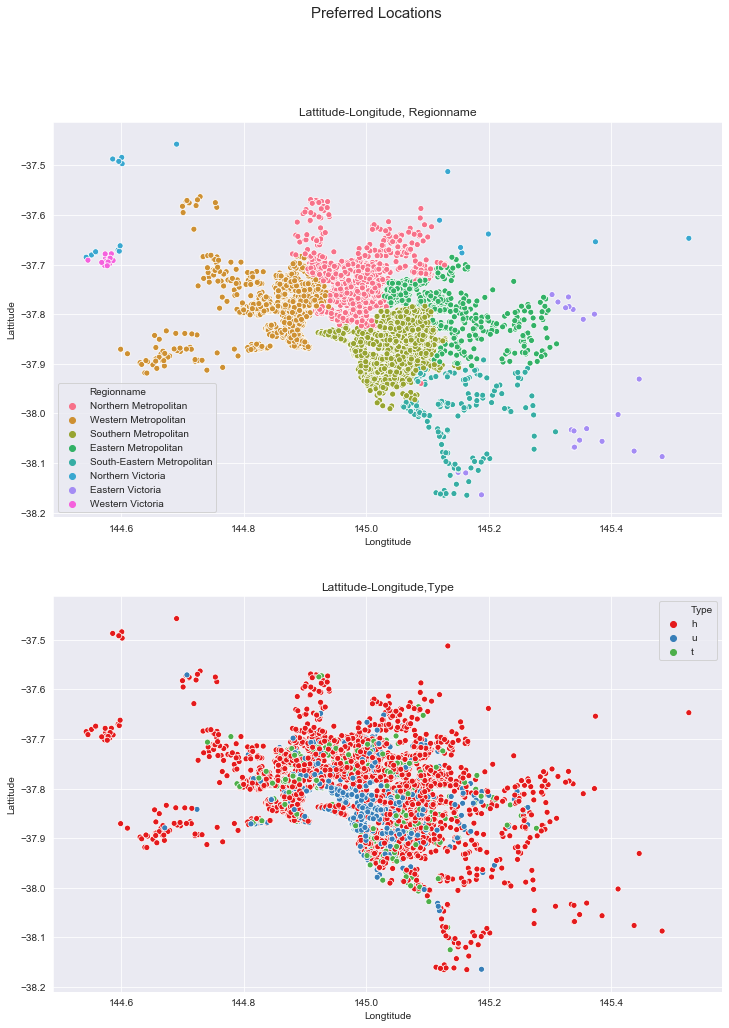

In [16]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 16))
fig.suptitle('Preferred Locations',fontsize=15)

sns.scatterplot(y=df['Lattitude'],x=df['Longtitude'],hue=df['Regionname'],palette='husl',ax=axarr[0]).set_title('Lattitude-Longitude, Regionname')
sns.scatterplot(y=df['Lattitude'],x=df['Longtitude'],hue=df['Type'],palette='Set1',ax=axarr[1]).set_title('Lattitude-Longitude,Type')
plt.show()

Text(0.5, 1.0, 'Price vs Type')

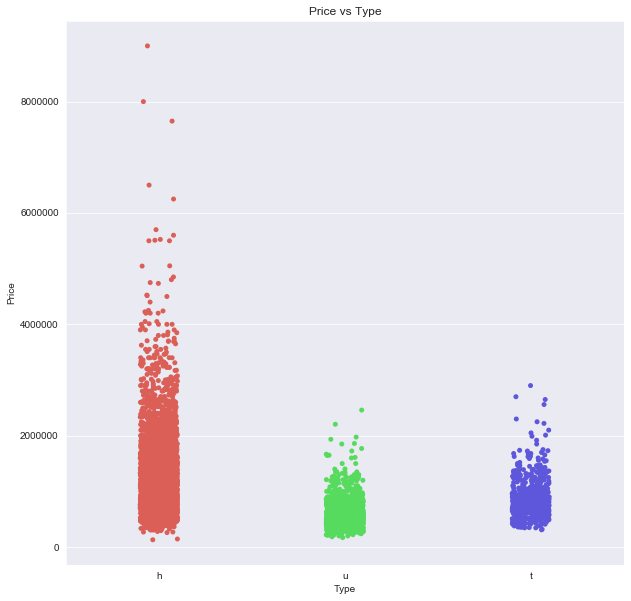

In [17]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df['Type'],y=df['Price'],palette='hls').set_title('Price vs Type')

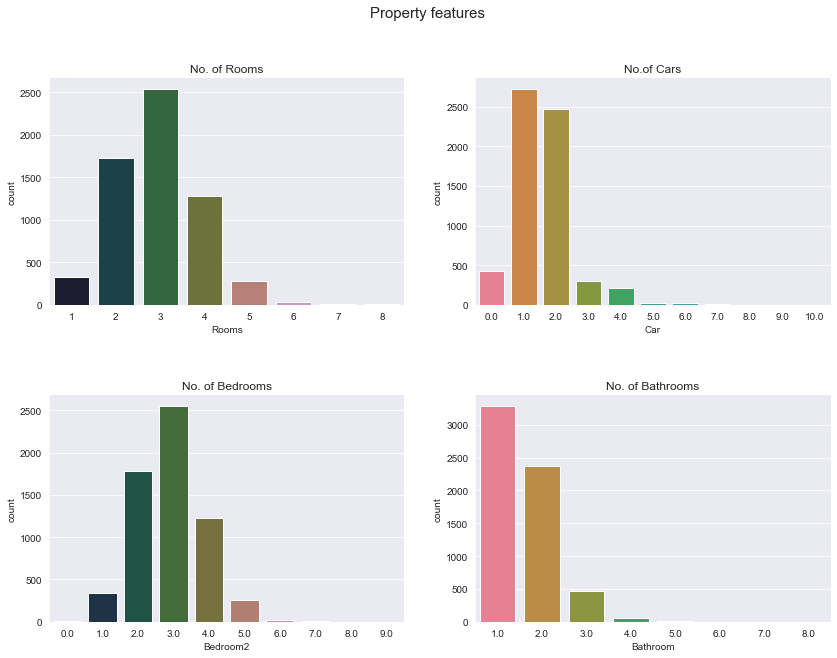

In [18]:
fig, axarr = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle('Property features',fontsize=15)

sns.countplot(df['Rooms'],ax=axarr[0][0],palette='cubehelix').set_title('No. of Rooms')
sns.countplot(df['Bedroom2'],ax=axarr[1][0],palette='cubehelix').set_title('No. of Bedrooms')
sns.countplot(df['Bathroom'],ax=axarr[1][1],palette='husl').set_title('No. of Bathrooms')
sns.countplot(df['Car'],ax=axarr[0][1],palette='husl').set_title('No.of Cars')

plt.subplots_adjust(hspace=.4)
sns.set_style('darkgrid')
sns.despine()

In [19]:
#df['CouncilArea'].unique()

In [20]:
#df clean_price(x):
 #   x = str(x)
 #   x = x.replace("0","zero")
  #  return str(x)

In [21]:
#df["CouncilArea"] = df["CouncilArea"].map(clean_price)

In [22]:
df.drop(['Address','Date'], axis = 1, inplace = True) 

In [23]:
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes("object")

In [24]:
df_num.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0


In [25]:
df_cat.head()

,Suburb,Type,Method,SellerG,CouncilArea,Regionname
1,Abbotsford,h,S,Biggin,Yarra,Northern Metropolitan
2,Abbotsford,h,SP,Biggin,Yarra,Northern Metropolitan
4,Abbotsford,h,VB,Nelson,Yarra,Northern Metropolitan
6,Abbotsford,h,S,Nelson,Yarra,Northern Metropolitan
7,Abbotsford,h,S,Nelson,Yarra,Northern Metropolitan


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

C:\Users\Moraya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df_cat.head()

,Suburb,Type,Method,SellerG,CouncilArea,Regionname
1,0,0,1,18,29,2
2,0,0,3,18,29,2
4,0,0,4,112,29,2
6,0,0,1,112,29,2
7,0,0,1,112,29,2


In [29]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [30]:
df_new.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb,Type,Method,SellerG,CouncilArea,Regionname
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,0,0,1,18,29,2
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,0,0,3,18,29,2
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,0,0,4,112,29,2
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0,0,0,1,112,29,2
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0,0,0,1,112,29,2


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
X = df_new.drop("Price",axis=1)
y = df["Price"]

In [33]:
#Factors affecting the House Price based on the overall analysis:
# Rooms
# Distance
# Suburb
# CouncilArea
# Type
# Bathroom
# BuildingArea
# Regionname
# Landsize based on the type of house

In [34]:
df_new = df[["Rooms","Distance","CouncilArea","Type","Suburb","BuildingArea","Landsize"]]

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
lin = LinearRegression()

lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# Train score
lin.score(X_train,y_train)

0.6473989635548931

In [38]:
# Test score
lin.score(X_test,y_test)

0.5946851496164856

In [39]:
lin.coef_

array([ 1.21880031e+05, -4.64046096e+04,  8.94609280e+02,  3.10170244e+03,
        2.19095450e+05,  6.09751207e+04,  3.32923233e+01,  1.42408173e+03,
       -3.26802692e+03, -7.90520008e+05,  1.01958649e+06, -2.34702070e-01,
       -3.57312966e+02, -1.60373177e+05, -9.90740306e+02, -1.85525020e+02,
       -4.94508547e+03,  2.79639610e+04])

In [40]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [41]:
# Ridge
l2 = Ridge(100)
l2.fit(X_train,y_train)
l2.coef_

array([ 1.06965285e+05, -4.75847400e+04,  1.47726926e+03,  2.52358133e+04,
        2.14787640e+05,  5.99989469e+04,  3.57078648e+01,  1.52973903e+03,
       -3.55318901e+03, -1.83138465e+05,  2.42725957e+05, -8.13911484e-01,
       -5.12690984e+02, -1.34319905e+05, -4.16151368e+03, -2.25179464e+02,
       -7.19662479e+03,  1.71488042e+04])

In [42]:
# Lasso helps in feature selection
l1 = Lasso(500)
l1.fit(X_train,y_train)
l1.coef_

array([ 1.22363864e+05, -4.64244807e+04,  9.50521660e+02,  2.42612465e+03,
        2.19449748e+05,  6.04423639e+04,  3.35267211e+01,  1.43680206e+03,
       -3.30675568e+03, -6.99061467e+05,  9.63784753e+05, -3.18274193e-01,
       -3.72547473e+02, -1.57488291e+05, -9.09809945e+02, -1.87130826e+02,
       -5.15094574e+03,  2.76206075e+04])

In [43]:
for i in range(50):
    l2 = Ridge(alpha=i)
    l2.fit(X_train,y_train)
    print(i,":",l2.score(X_test,y_test))

0 : 0.5946851496164826
1 : 0.5942881649786957
2 : 0.5938813438508279
3 : 0.5934684922737032
4 : 0.5930526596061012
5 : 0.5926362846127833
6 : 0.5922213123303001
7 : 0.5918092877276316
8 : 0.5914014309613643
9 : 0.590998698017014
10 : 0.590601829721427
11 : 0.5902113914744882
12 : 0.5898278055506653
13 : 0.589451377431838
14 : 0.5890823173292272
15 : 0.5887207578147671
16 : 0.5883667682960441
17 : 0.5880203669223805
18 : 0.5876815303941068
19 : 0.5873502020555124
20 : 0.5870262985791543
21 : 0.5867097154911992
22 : 0.5864003317410056
23 : 0.5860980134808229
24 : 0.5858026171914149
25 : 0.5855139922650654
26 : 0.5852319831377419
27 : 0.5849564310461184
28 : 0.5846871754720242
29 : 0.5844240553262579
30 : 0.5841669099147828
31 : 0.583915579723228
32 : 0.5836699070495343
33 : 0.5834297365097332
34 : 0.5831949154376918
35 : 0.5829652941963475
36 : 0.582740726415037
37 : 0.5825210691652523
38 : 0.5823061830851572
39 : 0.5820959324615672
40 : 0.581890185276646
41 : 0.5816888132255731
42 : 0.5

In [44]:
for i in range(200,500,50):
    l1 = Lasso(alpha=i)
    l1.fit(X_train,y_train)
    print(i,":",l1.score(X_test,y_test))

200 : 0.5942880927065259
250 : 0.5941826877336231
300 : 0.5940748265761471
350 : 0.5939645090426224
400 : 0.5938517352825778
450 : 0.5937365052232955


In [45]:
# Final models
l2 = Ridge(alpha=2)
l2.fit(X_train,y_train)
print(l2.score(X_test,y_test))

0.5938813438508279


In [46]:
l2.coef_

array([ 1.21847198e+05, -4.64987451e+04,  9.40879178e+02,  3.29988053e+03,
        2.19806342e+05,  6.09153368e+04,  3.34719977e+01,  1.42917044e+03,
       -3.29166830e+03, -7.40126256e+05,  9.58949634e+05, -2.78796144e-01,
       -3.69452011e+02, -1.58670364e+05, -1.23962129e+03, -1.88430578e+02,
       -5.12516150e+03,  2.71487312e+04])

In [47]:
l1 = Lasso(alpha=2000)
l1.fit(X_train,y_train)
print(l1.score(X_test,y_test))

0.5889460526752404


In [48]:
l1.coef_

array([ 1.23819670e+05, -4.64840702e+04,  1.11825880e+03,  3.95541502e+02,
        2.20512588e+05,  5.88440408e+04,  3.42298971e+01,  1.47496113e+03,
       -3.42294331e+03, -4.24686279e+05,  7.96378560e+05, -5.68986276e-01,
       -4.18250898e+02, -1.48833339e+05, -6.67005642e+02, -1.91948864e+02,
       -5.76852605e+03,  2.65904982e+04])

## Cross validation :-

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
l1_cross = cross_val_score(l1,X,y,cv=4)

In [51]:
l1_cross

array([0.59429774, 0.67354762, 0.62305827, 0.41160358])

In [52]:
l2_cross = cross_val_score(l2,X,y,cv=4)

In [53]:
l2_cross

array([0.60046073, 0.67790299, 0.62726222, 0.45855188])

In [54]:
np.mean(l1_cross)

0.575626802240494

In [55]:
np.mean(l2_cross)

0.5910444525553453